### **Наглядное представление простейшей интеллектуальной обработки текста**

Подключение Google Disk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Установка и подключение необходимых библиотек 

In [ ]:
import os
print(os.getcwd())

In [ ]:
!pip install pymorphy2

In [ ]:
!pip install --upgrade gensim

In [ ]:
from drive.MyDrive.NLP_work import dataset
import bs4 as bs
import urllib.request
import re
import nltk
from gensim.models import Word2Vec, KeyedVectors
from gensim.corpora import Dictionary
nltk.download('punkt')
nltk.download('stopwords')
import os
import pymorphy2

Подготовка текста Воздушного Кодекса

In [5]:
article_text = ''
with open(os.path.join('/content/drive/MyDrive', 'NLP_work', 'example', 'txt', 'voz_kod', 'voz_kod', 'voz_kod.txt'), 'r', encoding='utf-8') as r:
    for line in r:
        article_text += line
processed_article = article_text.lower()
processed_article = re.sub('[^а-яА-Я]', ' ', processed_article)
processed_article = re.sub(r'\s+', ' ', processed_article)

Подготовка набора данных из слов ВК

Происходит разбиение всего текста на отдельные слова (токенизация)

In [6]:
# all_sentences = nltk.sent_tokenize(processed_article)
# all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
all_words = nltk.word_tokenize(processed_article)
# print(len(all_words[0]))
# print(len(alll_words))
print(all_words)
# print('=======================================================================')
# print(alll_words)

['глава', 'общие', 'положения', 'статья', 'суверенитет', 'в', 'отношении', 'воздушного', 'пространства', 'российской', 'федерации', 'российская', 'федерация', 'обладает', 'полным', 'и', 'исключительным', 'суверенитетом', 'в', 'отношении', 'воздушного', 'пространства', 'российской', 'федерации', 'под', 'воздушным', 'пространством', 'российской', 'федерации', 'понимается', 'воздушное', 'пространство', 'над', 'территорией', 'российской', 'федерации', 'в', 'том', 'числе', 'воздушное', 'пространство', 'над', 'внутренними', 'водами', 'и', 'территориальным', 'морем', 'статья', 'воздушное', 'законодательство', 'российской', 'федерации', 'воздушное', 'законодательство', 'российской', 'федерации', 'состоит', 'из', 'настоящего', 'кодекса', 'федеральных', 'законов', 'указов', 'президента', 'российской', 'федерации', 'постановлений', 'правительства', 'российской', 'федерации', 'федеральных', 'правил', 'использования', 'воздушного', 'пространства', 'федеральных', 'авиационных', 'правил', 'а', 'также

Обработка токенов (слов)

Убирает "стоп-слова" из набора, склоняет слова в именительном падеже

In [7]:
# Removing Stop Words
# ПРИВЕДЕНИЕ К НАЧАЛЬНОЙ ФОРМЕ С ЛЕММАТИЗАЦИЕЙ
morph = pymorphy2.MorphAnalyzer()
from nltk.corpus import stopwords
# print(stopwords.words('russian'))
for i, idx in zip(all_words.copy(), range(len(all_words))):
# for i in all_words.copy():
    if i in stopwords.words('russian'):
        all_words.remove(i)
    try:
        m = morph.parse(i)[0]
#         all_words.insert(idx, m.normal_form)
#         print(f'{i} --> {m.normal_form}')
        all_words.insert(idx, m.inflect({'nomn'}).word)
#         print(f'{i} --> {m.inflect({"nomn"}).word}')
    except AttributeError:
#         print(f'{i}*')
        continue
print(all_words)

['глава', 'общие', 'положение', 'статья', 'суверенитет', 'глава', 'отношение', 'воздушное', 'пространство', 'российская', 'федерация', 'российская', 'федерация', 'обладающий', 'полный', 'общие', 'исключительное', 'суверенитет', 'положения', 'отношение', 'воздушное', 'пространство', 'российская', 'федерация', 'статья', 'воздушный', 'пространство', 'российская', 'федерация', 'понимающийся', 'воздушное', 'пространство', 'суверенитет', 'территория', 'российская', 'федерация', 'отношении', 'число', 'воздушное', 'пространство', 'воздушного', 'внутренние', 'воды', 'пространства', 'территориальный', 'море', 'статья', 'воздушное', 'законодательство', 'российская', 'федерация', 'воздушное', 'законодательство', 'российская', 'федерация', 'состоящий', 'российской', 'настоящий', 'кодекс', 'федеральные', 'законы', 'указы', 'президент', 'российская', 'федерация', 'постановления', 'правительство', 'российская', 'федерация', 'федеральные', 'правила', 'использование', 'воздушное', 'пространство', 'федер

Создание объекта (применение алгоритмов Word2Vec)

По сути производится обучение типа "как лучше всего преобразовать слово в вектор"

In [57]:
word2vec = Word2Vec([all_words], min_count=10, workers=4, vector_size=300, window=2, negative=10, alpha=0.03, min_alpha=0.0007, sample=6e-5, sg=1)

In [58]:
vocabulary = word2vec.wv.key_to_index
print(vocabulary)

{'воздушное': 0, 'воздушного': 1, 'статья': 2, 'воздушные': 3, 'российская': 4, 'федерация': 5, 'российской': 6, 'федерации': 7, 'судна': 8, 'судная': 9, 'воздушных': 10, 'авиация': 11, 'авиации': 12, 'суда': 13, 'перевозка': 14, 'воздушная': 15, 'пассажир': 16, 'судов': 17, 'перевозчик': 18, 'орган': 19, 'перевозки': 20, 'авиационные': 21, 'правила': 22, 'порядок': 23, 'договор': 24, 'области': 25, 'область': 26, 'уполномоченный': 27, 'воздушной': 28, 'лица': 29, 'государственная': 30, 'пассажира': 31, 'гражданская': 32, 'гражданской': 33, 'использование': 34, 'они': 35, 'соответствие': 36, 'бедствие': 37, 'также': 38, 'которые': 39, 'федеральные': 40, 'государственной': 41, 'груз': 42, 'судно': 43, 'требования': 44, 'обеспечение': 45, 'деятельность': 46, 'пространство': 47, 'полёты': 48, 'лицо': 49, 'авиационное': 50, 'органом': 51, 'органы': 52, 'ответственность': 53, 'гражданские': 54, 'аэродромы': 55, 'обслуживание': 56, 'багаж': 57, 'соответствии': 58, 'он': 59, 'пространства': 6

Пример представления слова "меры" в векторе

In [92]:
word2vec.train([all_words], total_examples=word2vec.corpus_count, epochs=50, report_delay=1)

(274236, 1687450)

In [ ]:
v1 = word2vec.wv["командир"]
v2 = word2vec.wv['экипаж']
print(v1)

Полученные вектора можно сравнивать!

Здесь получаем 10 наиболее близких слов к слову "правила", по сути сравнивая их векторное представление

In [94]:
sim_words = word2vec.wv.most_similar("правила")
print(sim_words)

[('федеральные', 0.9435761570930481), ('порядок', 0.9340034127235413), ('указанные', 0.9260757565498352), ('устанавливающиеся', 0.9048315286636353), ('общее', 0.8950928449630737), ('данные', 0.88725346326828), ('осуществляющийся', 0.8785282373428345), ('возлагающийся', 0.8723054528236389), ('соответствующие', 0.8683558702468872), ('основание', 0.866430938243866)]


Попробуйте сложить векторы разных слов и посмотреть какие слова 

In [107]:
word2vec.wv.similar_by_vector(word2vec.wv["судно"] + word2vec.wv["командир"])

[('член', 0.9633151888847351),
 ('командир', 0.956129789352417),
 ('судно', 0.942473292350769),
 ('пилотируемый', 0.940477728843689),
 ('экипаж', 0.9388418197631836),
 ('опасность', 0.9327871203422546),
 ('состав', 0.9256495237350464),
 ('беспилотный', 0.9143598079681396),
 ('члены', 0.9131657481193542),
 ('потерпевший', 0.9027866721153259)]

In [98]:
word2vec.wv.most_similar(positive=["экипаж"])

[('экспериментальное', 0.9709339737892151),
 ('пилотируемый', 0.9704996347427368),
 ('член', 0.9554005265235901),
 ('члены', 0.954189121723175),
 ('беспилотный', 0.9344184994697571),
 ('судная', 0.9301880598068237),
 ('гражданин', 0.9299489259719849),
 ('находящиеся', 0.914828896522522),
 ('борт', 0.912278950214386),
 ('командир', 0.907763659954071)]

In [65]:
import matplotlib.pyplot as plt
# print(word2vec.wv["кодекс"])
vec_voc = {k: word2vec.wv[k] for k in vocabulary.keys()}
print(len(vec_voc.values()), len(vec_voc.keys()))
# print(list(vec_voc.values()))

684 684


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction 
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.get_vector(word)]
    word_labels = [word]
    color_list = ['red']
    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.get_vector(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.get_vector(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')
    # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(12)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

def tsne_plot_common(model, list_words):
    vectors_words = []
    word_labels = []
    color_list = []
    for wrd in list_words:
        wrd_vector = model.wv.get_vector(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('blue')
     # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization')

Визуализация близости различных слов

На графике видно, что слово "аэродром" весьма близко понятию "вертодром"

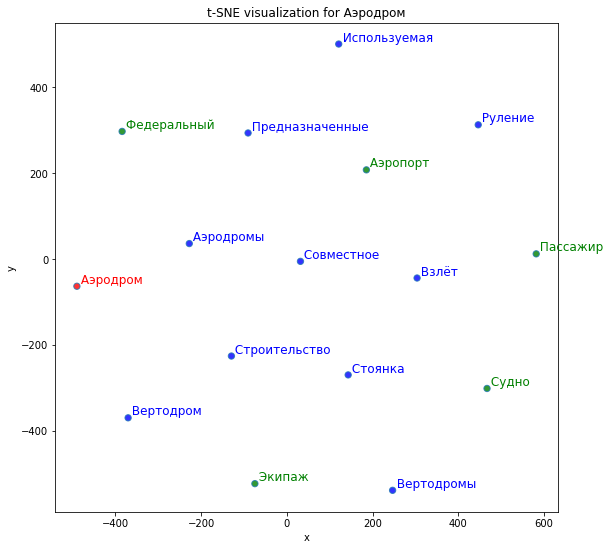

In [108]:
tsne_scatterplot(word2vec, "аэродром", ["аэропорт", "судно", "пассажир", "экипаж", "федеральный"])
# tsne_scatterplot(word2vec, "экипаж", vec_voc.keys())
# tsne_plot_common(word2vec, vec_voc.keys())
plt.show()